In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from colorama import Fore, Back, Style
import plotly.express as px


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv("../Life Expectancy Data.csv")

In [10]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [12]:
df = df.rename(columns={"Country": "country", "Year": "year", "Status": "status", "Life expectancy ": "life_exectancy",
                    "Adult Mortality": "adult_mortality", "infant deaths": "infant_deaths", "Alcohol": "alcohol",
                      "percentage expenditure": "percentage_expenditure", "Hepatitis B": "hepatitis_b", "Measles ":"measles",
                        " BMI ":"bmi", "under-five deaths":"under_five_deaths","Polio":"polio", "Total expenditure":"total_expenditure",
                        "Diphtheria ":"diphtheria ", " HIV/AIDS":"hiv_aids", "GDP":"gpd", "Population":"population", " thinness  1-19 years":"thinness_1-19_years",
                          " thinness 5-9 years":"thinness_5-9_years", "Income composition of resources":"income_composition_resources",
                            "Schooling":"schooling"})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       2938 non-null   object 
 1   year                          2938 non-null   int64  
 2   status                        2938 non-null   object 
 3   life_exectancy                2928 non-null   float64
 4   adult_mortality               2928 non-null   float64
 5   infant_deaths                 2938 non-null   int64  
 6   alcohol                       2744 non-null   float64
 7   percentage_expenditure        2938 non-null   float64
 8   hepatitis_b                   2385 non-null   float64
 9   measles                       2938 non-null   int64  
 10  bmi                           2904 non-null   float64
 11  under-five deaths             2938 non-null   int64  
 12  polio                         2919 non-null   float64
 13  tot

In [13]:
y = df.drop(columns=["country","status"], axis=1)
y.corr()


,year,life_exectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five deaths,polio,total_expenditure,diphtheria,hiv_aids,gpd,population,thinness_1-19_years,thinness_5-9_years,income_composition_resources,schooling
year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
life_exectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
adult_mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant_deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage_expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
hepatitis_b,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
bmi,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


In [50]:
# sns.heatmap(y.corr(), cmap="viridis", annot=True)
teste = df.loc[:, ::2]
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       2938 non-null   object 
 1   status                        2938 non-null   object 
 2   adult_mortality               2928 non-null   float64
 3   alcohol                       2744 non-null   float64
 4   hepatitis_b                   2385 non-null   float64
 5   bmi                           2904 non-null   float64
 6   polio                         2919 non-null   float64
 7   diphtheria                    2919 non-null   float64
 8   gpd                           2490 non-null   float64
 9   thinness_1-19_years           2904 non-null   float64
 10  income_composition_resources  2771 non-null   float64
dtypes: float64(9), object(2)
memory usage: 252.6+ KB


In [52]:
teste

,country,status,adult_mortality,alcohol,hepatitis_b,bmi,polio,diphtheria,gpd,thinness_1-19_years,income_composition_resources
0,Afghanistan,Developing,263.0,0.01,65.0,19.1,6.0,65.0,584.259210,17.2,0.479
1,Afghanistan,Developing,271.0,0.01,62.0,18.6,58.0,62.0,612.696514,17.5,0.476
2,Afghanistan,Developing,268.0,0.01,64.0,18.1,62.0,64.0,631.744976,17.7,0.470
3,Afghanistan,Developing,272.0,0.01,67.0,17.6,67.0,67.0,669.959000,17.9,0.463
4,Afghanistan,Developing,275.0,0.01,68.0,17.2,68.0,68.0,63.537231,18.2,0.454
...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,Developing,723.0,4.36,68.0,27.1,67.0,65.0,454.366654,9.4,0.407
2934,Zimbabwe,Developing,715.0,4.06,7.0,26.7,7.0,68.0,453.351155,9.8,0.418
2935,Zimbabwe,Developing,73.0,4.43,73.0,26.3,73.0,71.0,57.348340,1.2,0.427
2936,Zimbabwe,Developing,686.0,1.72,76.0,25.9,76.0,75.0,548.587312,1.6,0.427


Text(0, 0.5, 'Frequency')

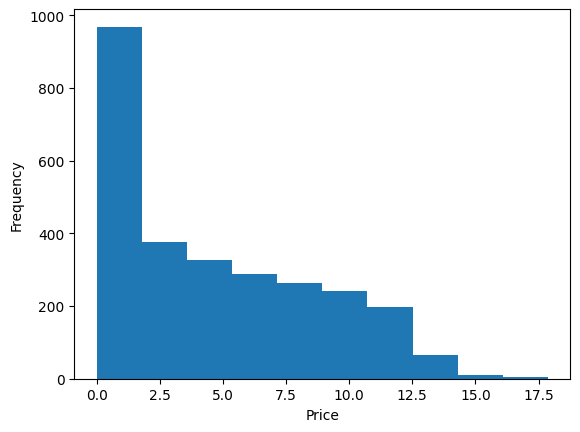

In [56]:
plt.hist(teste["alcohol"])
plt.xlabel('Price')
plt.ylabel('Frequency')

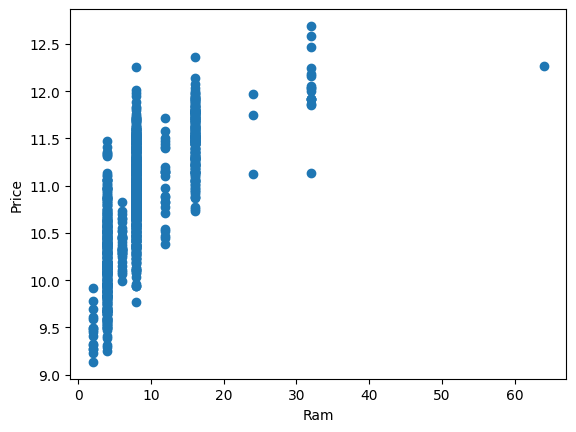

In [36]:
plt.scatter(df['Ram'],df['Price'])
plt.xlabel('Ram')
plt.ylabel('Price')
plt.show()

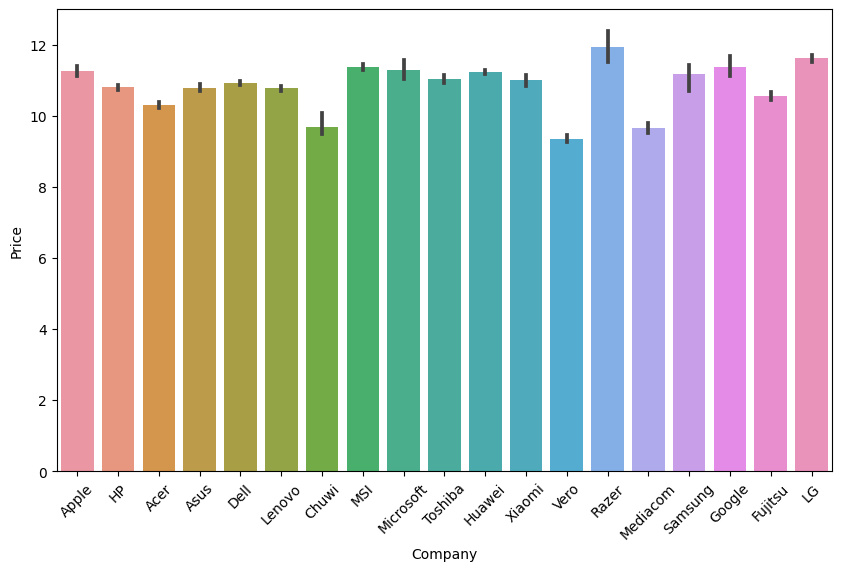

In [37]:
plt.figure(figsize=(10, 6))  # Increase the figure size
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation=45)  # Rotate the y-axis labels

plt.xlabel('Company')
plt.ylabel('Price')
plt.show()

In [38]:
# Extract relevant features
df['ScreenSize'] = df['Ppi'] * df['Weight']
df['StorageCapacity'] = df['HDD'] + df['SSD']

In [39]:
# Encode categorical features
# Transforma em novas atributos na tabela, com valores booleanos
df_encoded = pd.get_dummies(df, columns=['Company','TypeName', 'TouchScreen', 'Cpu_brand', 'Gpu_brand', 'Os'])

In [40]:
df_encoded.head()

,Ram,Weight,Price,Ips,Ppi,HDD,SSD,ScreenSize,StorageCapacity,Company_Acer,...,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_AMD,Gpu_brand_Intel,Gpu_brand_Nvidia,Os_Mac,Os_Others,Os_Windows
0,8,1.37,11.175755,1,226.983005,0,128,310.966716,128,False,...,False,True,False,False,False,True,False,True,False,False
1,8,1.34,10.776777,0,127.677940,0,0,171.088440,0,False,...,False,True,False,False,False,True,False,True,False,False
2,8,1.86,10.329931,0,141.211998,0,256,262.654316,256,False,...,False,True,False,False,False,True,False,False,True,False
3,16,1.83,11.814476,1,220.534624,0,512,403.578362,512,False,...,False,False,True,False,True,False,False,True,False,False
4,8,1.37,11.473101,1,226.983005,0,256,310.966716,256,False,...,False,True,False,False,False,True,False,True,False,False


In [41]:
# Começar o treinamento em relação a feature a ser analizada

X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
le=LabelEncoder()
y_train = le.fit_transform(y_train)

In [45]:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)

In [46]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

mse_dt = mean_squared_error(y_test, dt_pred)

In [47]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, rf_pred)

In [48]:
print("Linear Regression MSE:" + Fore.CYAN + str(mse_lr) + Style.RESET_ALL)
print("Decision Tree Regression MSE:" + Fore.RED + str(mse_dt) + Style.RESET_ALL)
print("Random Forest Regression MSE:" + Fore.GREEN + str(mse_rf) + Style.RESET_ALL)

Linear Regression MSE:116104.86819311505
Decision Tree Regression MSE:124658.67161098325
Random Forest Regression MSE:120919.47471446396


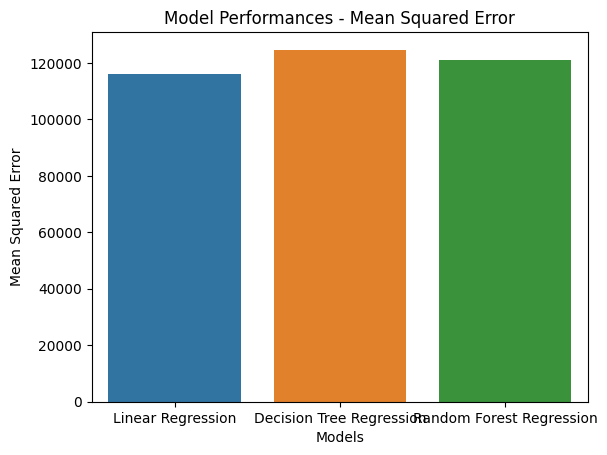

In [49]:
# Create a bar graph for model performances
models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression']
mse_scores = [mse_lr, mse_dt, mse_rf]

sns.barplot(x=models, y=mse_scores)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Model Performances - Mean Squared Error')

plt.show()